Activity 1

In [15]:
import pandas as pd  
df = pd.concat(map(pd.read_csv, ['./ampc/w1.csv', './ampc/w2.csv', './ampc/w3.csv', './ampc/w4.csv']), ignore_index=True) 
df = df.sample(frac=1) 
df.to_csv('./ampc/all_data.csv')

Activity 2

In [16]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
x = df.loc[:, df.columns != 'class'] 
y = df['class'] 

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=1)
clf = svm.SVC() 

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('Accuracy: ', accuracy_score(y_test,y_pred))

Accuracy:  0.8907996560619088


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn import svm   
scores = cross_val_score(clf, x, y, cv=10)
print('Accuracy: ', scores)

Accuracy:  [0.89767842 0.88822012 0.90885641 0.88564058 0.8822012  0.88048151
 0.89251935 0.8916595  0.88736028 0.90619621]


Activity 3

In [23]:
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define a smaller parameter grid
params_svm = { 
    'kernel': ['rbf'], 
    'C': np.logspace(-1, 2, 4),  # Logarithmic range
    'gamma': np.logspace(-3, 1, 5)  # Logarithmic range
}

# Use RandomizedSearchCV with fewer iterations
clf_2 = svm.SVC()
estimator_svm = RandomizedSearchCV(clf_2, param_distributions=params_svm, 
                                   n_iter=10, scoring='accuracy', cv=3, n_jobs=-1, random_state=1)  # Reduced iterations
estimator_svm.fit(x_train, y_train)
print(estimator_svm.best_params_)




{'kernel': 'rbf', 'gamma': 0.001, 'C': 10.0}


Activity 4

In [22]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_classif 

select_model = SelectKBest(f_classif, k=10) 
k_best = select_model.fit_transform(x, y) 

features = select_model.get_support()  
new_features = [] 

for bool_val, feature in zip(features, x.columns): 
    if bool_val: 
        new_features.append(feature)  

print(new_features)
        
x_new = pd.DataFrame(x, columns=new_features)

['acc_peak_y_right', 'acc_peak_xyz_right', 'acc_peak_yz_right', 'acc_mean_xy_left', 'acc_std_x_left', 'acc_std_xy_left', 'acc_std_yz_left', 'acc_std_zx_left', 'acc_max_xy_left', 'gyro_mean_xy_left']


In [25]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_new, y, test_size=0.3, random_state=1) 
clf_2 = svm.SVC(kernel='rbf', C=0.1, gamma=0.001) 
clf_2.fit(x_train_2, y_train_2) 
y_pred_2 = clf_2.predict(x_test_2) 
print("Accuracy: ", accuracy_score(y_test_2, y_pred_2))

Accuracy:  0.880768128403554


In [26]:
from sklearn.model_selection import cross_val_score

scores_2 = cross_val_score(clf_2, x_new, y, cv=10) 
print("Accuracy Score: ", scores_2)

Accuracy Score:  [0.88306105 0.87360275 0.89681857 0.88048151 0.87016337 0.87102322
 0.8822012  0.88306105 0.87790198 0.89414802]


Activity 5

In [27]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 

def apply_pca(x): 
    scaler = StandardScaler() 
    x_scaled = scaler.fit_transform(x)
     
    pca = PCA() 
    x_pca = pca.fit_transform(x_scaled) 
    component_names = [f"PC{i+1}" for i in range(x_pca.shape[1])] 
    x_pca = pd.DataFrame(x_pca, columns=component_names) 
    loadings = pd.DataFrame( 
        pca.components_.T, 
        columns=component_names, 
        index=x.columns
    ) 
    return pca, x_pca, loadings  

pca, data_pca, loadings = apply_pca(x_new) 
print(data_pca)

            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      2.649182  0.397722 -0.158300  1.591139  0.386734  0.028043  0.091579   
1      1.616143  0.474683 -0.748636  0.764202 -0.880875 -0.560329 -0.020409   
2      2.681991  2.232450  0.675082 -0.231057 -0.230756 -0.581396  0.178312   
3      0.812339  0.777555  0.090282  0.024171  0.420644 -0.153687  0.972885   
4     -1.352592 -0.324793 -0.126792 -0.109131  0.424858 -0.004621  0.061014   
...         ...       ...       ...       ...       ...       ...       ...   
11624  0.577352 -2.399969  0.383439 -0.369301  0.473948 -0.043630 -0.219731   
11625  3.044736  2.312790  0.706347  0.542111  0.716429  1.109623 -0.578994   
11626  2.811098 -0.202387 -0.519630  0.854281  0.339628 -0.921562  0.089001   
11627 -0.493272  2.696614 -0.973129  0.141446  0.560174 -0.210087  0.025684   
11628 -0.747864 -0.074477  0.800882  0.115084  0.334613  0.226131  0.398984   

            PC8       PC9      PC10  
0      0.2285

Activity 6

In [28]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score 
from sklearn.feature_selection import SelectKBest, f_classif 
from sklearn.decomposition import PCA 
from sklearn.metrics import accuracy_score 

data = pd.read_csv('./ampc/all_data.csv') 
X = data.iloc[:, :-1] 
y = data.iloc[:, -1] 

def evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    model = SVC(C=1, gamma=0.1, kernel='rbf')  # Fixed parameters for faster evaluation
    model.fit(X_train, y_train)
    return accuracy_score(y_test, model.predict(X_test)) 

def evaluate_model_with_tuning(X, y): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
    param_grid = { 
        'C': [0.1, 1, 10], 
        'gamma': [1, 0.1, 0.01], 
        'kernel':['rbf']                         
    } 
    grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, n_jobs=-1, verbose=0) 
    grid.fit(X_train, y_train) 
     
    best_model = grid.best_estimator_ 
    accuracy = accuracy_score(y_test, best_model.predict(X_test)) 
    return accuracy

# Evaluate models
print(f"Original Features: Train-test accuracy = {evaluate_model(X, y):.4f}") 

print(f"With Hyperparameter Tuning: Train-test accuracy = {evaluate_model_with_tuning(X, y):.4f}")

X_fs = SelectKBest(f_classif, k=100).fit_transform(X, y)
print(f"With Feature Selection: Train-test accuracy = {evaluate_model(X_fs, y):.4f}") 
print(f"With Feature Selection and Hyperparameter Tuning: Train-test accuracy = {evaluate_model_with_tuning(X_fs, y):.4f}")

X_pca = PCA(n_components=10).fit_transform(X)
print(f"With PCA: Train-test accuracy = {evaluate_model(X_pca, y):.4f}") 
print(f"With PCA and Hyperparameter Tuning: Train-test accuracy = {evaluate_model_with_tuning(X_pca, y):.4f}")



Original Features: Train-test accuracy = 0.8409


KeyboardInterrupt: 

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score 

# Load data
data = pd.read_csv('./ampc/all_data.csv') 
X = data.iloc[:, :-1] 
y = data.iloc[:, -1]  

def evaluate_model(X, y, cv=3):  # Reduced cv for faster computation
    model = SVC(C=1, gamma=0.1, kernel='rbf')
    scores = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
    return scores.mean() 

def evaluate_model_with_tuning(X, y, cv=3): 
    param_grid = { 
        'C': [0.1, 1, 10], 
        'gamma': [1, 0.1, 0.01], 
        'kernel':['rbf']                         
    } 
    grid = GridSearchCV(SVC(), param_grid, refit=True, cv=cv, n_jobs=-1, verbose=0)
    grid.fit(X, y)
     
    best_model = grid.best_estimator_  
    scores = cross_val_score(best_model, X, y, cv=cv, n_jobs=-1)
    return scores.mean() 

# Evaluate models
print(f"Original Features: Cross validation accuracy = {evaluate_model(X, y):.4f}")

print(f"With Hyperparameter Tuning: Cross validation accuracy = {evaluate_model_with_tuning(X, y):.4f}")

# Feature selection
X_fs = SelectKBest(f_classif, k=100).fit_transform(X, y)
print(f"With Feature Selection: Cross validation accuracy = {evaluate_model(X_fs, y):.4f}") 
print(f"With Feature Selection and Hyperparameter Tuning: Cross validation accuracy = {evaluate_model_with_tuning(X_fs, y):.4f}")

# PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
print(f"With PCA: Cross validation accuracy = {evaluate_model(X_pca, y):.4f}") 
print(f"With PCA and Hyperparameter Tuning: Cross validation accuracy = {evaluate_model_with_tuning(X_pca, y):.4f}")


Original Features: Cross validation accuracy = 0.8335
With Hyperparameter Tuning: Cross validation accuracy = 0.8335
With Feature Selection: Cross validation accuracy = 0.8335
With Feature Selection and Hyperparameter Tuning: Cross validation accuracy = 0.8337
With PCA: Cross validation accuracy = 0.8335
With PCA and Hyperparameter Tuning: Cross validation accuracy = 0.8338


Activity 7

In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split, cross_val_score  
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score  
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neural_network import MLPClassifier 

data = pd.read_csv('./ampc/all_data.csv')  
x = data.drop('class', axis=1) 
y = data['class'] 
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 
 
# Train-test split #1
svm = SVC() 
svm.fit(x_train, y_train) 
y_pred = svm.predict(x_test) 
svm_accuracy_split = accuracy_score(y_test, y_pred) 
print(f"SVM Classifier Accuracy (Train-Test Split): {svm_accuracy_split:.2%}")
 
# Cross validation #1
svm_cv_scores = cross_val_score(svm, x, y, cv=5) 
svm_accuracy_cv = svm_cv_scores.mean() 
print(f"SVM Classifier Accuracy (Cross Validation): {svm_accuracy_cv:.2%}") 

# Train-test split #2 
sgd = SGDClassifier() 
sgd.fit(x_train, y_train) 
y_pred_2 = sgd.predict(x_test) 
sgd_accuracy_split = accuracy_score(y_test, y_pred_2) 
print(f"SGD Classifier Accuracy (Train-Test Split): {sgd_accuracy_split:.2%}") 
 
# Cross validation #2
sgd_cv_scores = cross_val_score(sgd, x, y, cv=5) 
sgd_accuracy_cv = sgd_cv_scores.mean() 
print(f"SGD Classifier Accuracy (Cross Validation): {sgd_accuracy_cv:.2%}")  

# Train-test split #3 
rf = RandomForestClassifier() 
rf.fit(x_train, y_train) 
y_pred_3 = rf.predict(x_test) 
rf_accuracy_split = accuracy_score(y_test, y_pred_3)  
print(f"RF Classifier Accuracy (Train-Test Split): {rf_accuracy_split:.2%}")  

# Cross validation #3
rf_cv_scores = cross_val_score(sgd, x, y, cv=5) 
rf_accuracy_cv = rf_cv_scores.mean() 
print(f"RF Classifier Accuracy (Cross Validation): {rf_accuracy_cv:.2%}")   

# Train-test split #4 
mlp = MLPClassifier(max_iter=500)
mlp.fit(x_train, y_train) 
y_pred_4 = mlp.predict(x_test) 
mlp_accuracy_split = accuracy_score(y_test, y_pred_4)  
print(f"MLP Classifier Accuracy (Train-Test Split): {mlp_accuracy_split:.2%}")  

# Cross validation #4
mlp_cv_scores = cross_val_score(sgd, x, y, cv=5) 
mlp_accuracy_cv = mlp_cv_scores.mean() 
print(f"MLP Classifier Accuracy (Cross Validation): {mlp_accuracy_cv:.2%}")  



SVM Classifier Accuracy (Train-Test Split): 89.28%
SVM Classifier Accuracy (Cross Validation): 89.57%
SGD Classifier Accuracy (Train-Test Split): 85.04%
SGD Classifier Accuracy (Cross Validation): 83.79%
RF Classifier Accuracy (Train-Test Split): 93.26%
RF Classifier Accuracy (Cross Validation): 88.31%
MLP Classifier Accuracy (Train-Test Split): 90.54%
MLP Classifier Accuracy (Cross Validation): 85.04%


In [ ]:
print("Available variables:", list(globals().keys()))

Available variables: ['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '__vsc_ipynb_file__', '_i', '_ii', '_iii', '_i1', 'pickle', 'filename', '_i2', '_i3']


Studio 4 Activity 2:

In [29]:
from sklearn.model_selection import train_test_split 
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(data_pca, y, test_size=0.3, random_state=1) 
clf_3 = svm.SVC(kernel='rbf', C=10, gamma=10)  
clf_3.fit(x_train_3, y_train_3) 
y_pred_3 = clf_3.predict(x_test_3) 
print("Accuracy: ", accuracy_score(y_test_3, y_pred_3))

Accuracy:  0.8586987675551734


In [30]:
import warnings  
from sklearn.metrics import classification_report   
warnings.filterwarnings('ignore')  

print(classification_report(y_test_3, y_pred_3))

              precision    recall  f1-score   support

           0       0.68      0.25      0.36       440
           1       0.32      0.05      0.09       115
           2       0.87      0.98      0.92      2934

    accuracy                           0.86      3489
   macro avg       0.62      0.43      0.46      3489
weighted avg       0.83      0.86      0.82      3489



Studio 4 Activity 3

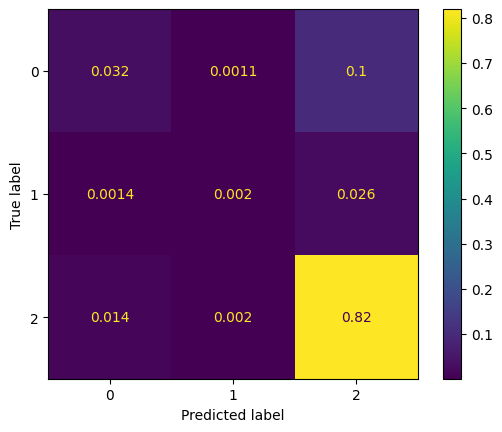

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
import matplotlib.pyplot as plt 
 
cm = confusion_matrix(y_test_3, y_pred_3, normalize='all') 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_3.classes_) 
disp.plot()

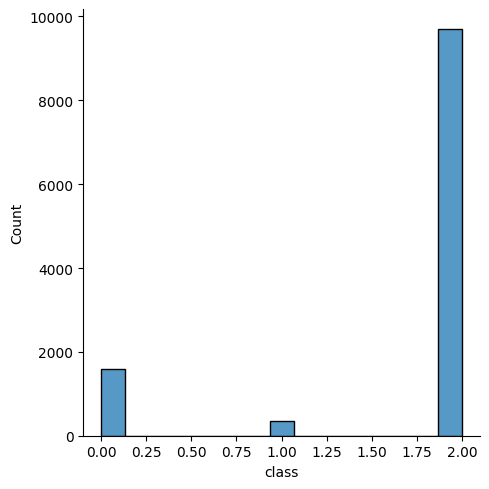

In [ ]:
import seaborn as sns 
sns.displot(y)

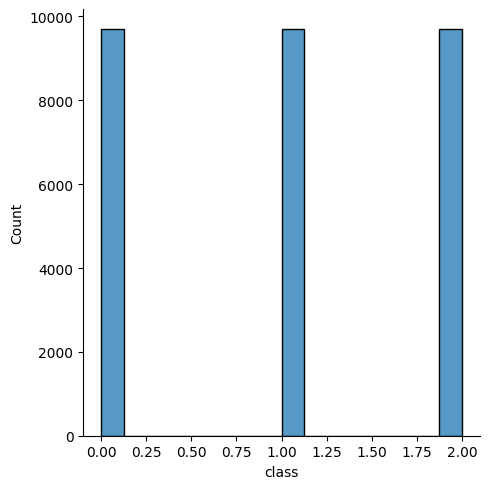

In [ ]:
import seaborn as sns  
from imblearn.over_sampling import RandomOverSampler  # type: ignore
ros = RandomOverSampler(random_state=42) 
x_resmapled_1, y_resampled_1 = ros.fit_resample(x, y) 
sns.displot(y_resampled_1)

Studio 4 Activity 4

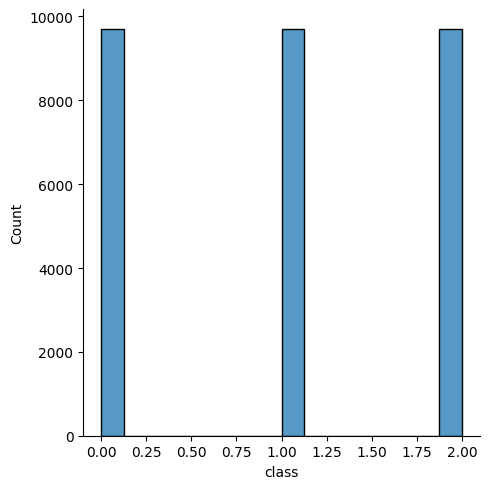

In [ ]:
import seaborn as sns 
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler(random_state=42) 
smote = SMOTE(random_state=42) 
x_resmapled_2, y_resampled_2 = ros.fit_resample(x, y) 
sns.displot(y_resampled_2)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2925
           1       1.00      1.00      1.00      2851
           2       0.99      1.00      0.99      2948

    accuracy                           1.00      8724
   macro avg       1.00      1.00      1.00      8724
weighted avg       1.00      1.00      1.00      8724



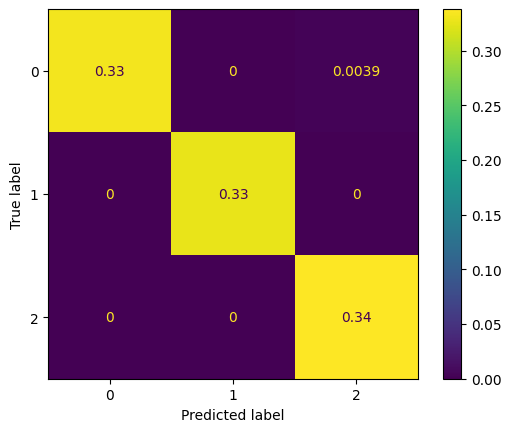

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from sklearn.metrics import classification_report    
from sklearn.model_selection import train_test_split
x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(x_resmapled_2, y_resampled_2, test_size=0.3, random_state=1) 
 
clf_3 = svm.SVC(kernel='rbf', C=10, gamma=0.001)  
clf_3.fit(x_train_4, y_train_4) 
y_pred_4 = clf_3.predict(x_test_4) 
 
print(classification_report(y_test_4, y_pred_4)) 
  
cm = confusion_matrix(y_test_4, y_pred_4, normalize='all') 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_3.classes_) 
disp.plot()
 

Studio 4 Activity 5

In [31]:
import pickle 
filename = "best_svc_model.pkl" 
pickle.dump(clf_3, open(filename,'wb'))

Studio 4 Activity 6

In [37]:
model = pickle.load(open(filename, 'rb')) 
 
test_set = pd.read_csv('./ampc/w4.csv') 

x = test_set.loc[:, df.columns != 'class'] 
y = test_set['class'] 

count = 0 

for i in range(0,len(x)): 
    y_pred_i = model.predict(x.iloc[i].to_numpy().reshape(1,-1)) 
    if y_pred_i[0] == y.iloc[i]: 
        count += 1 
         
print('Count: ', count, ' Accuracy: ', count/len(x))

ValueError: X has 156 features, but SVC is expecting 10 features as input.